# Lead Genration

In [7]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Upgrad_Projects /Leads Data Dictionary.xlsx')
leads_data = pd.read_csv('/content/drive/MyDrive/Upgrad_Projects /Leads.csv')

In [8]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(leads_data.head())

First few rows of the dataset:
                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Display the summary of the dataset
print("\nSummary of the dataset:")
print(leads_data.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(leads_data.isnull().sum())

# Check the distribution of the target variable
print("\nDistribution of the target variable ('Converted'):")
print(leads_data['Converted'].value_counts())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit       

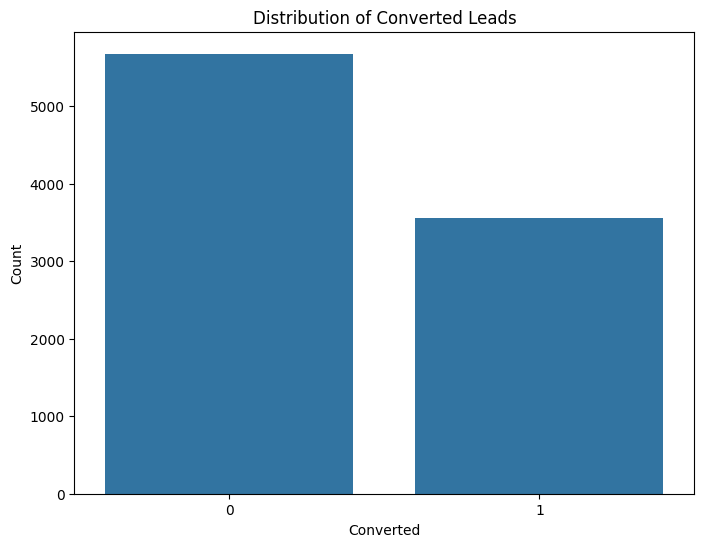

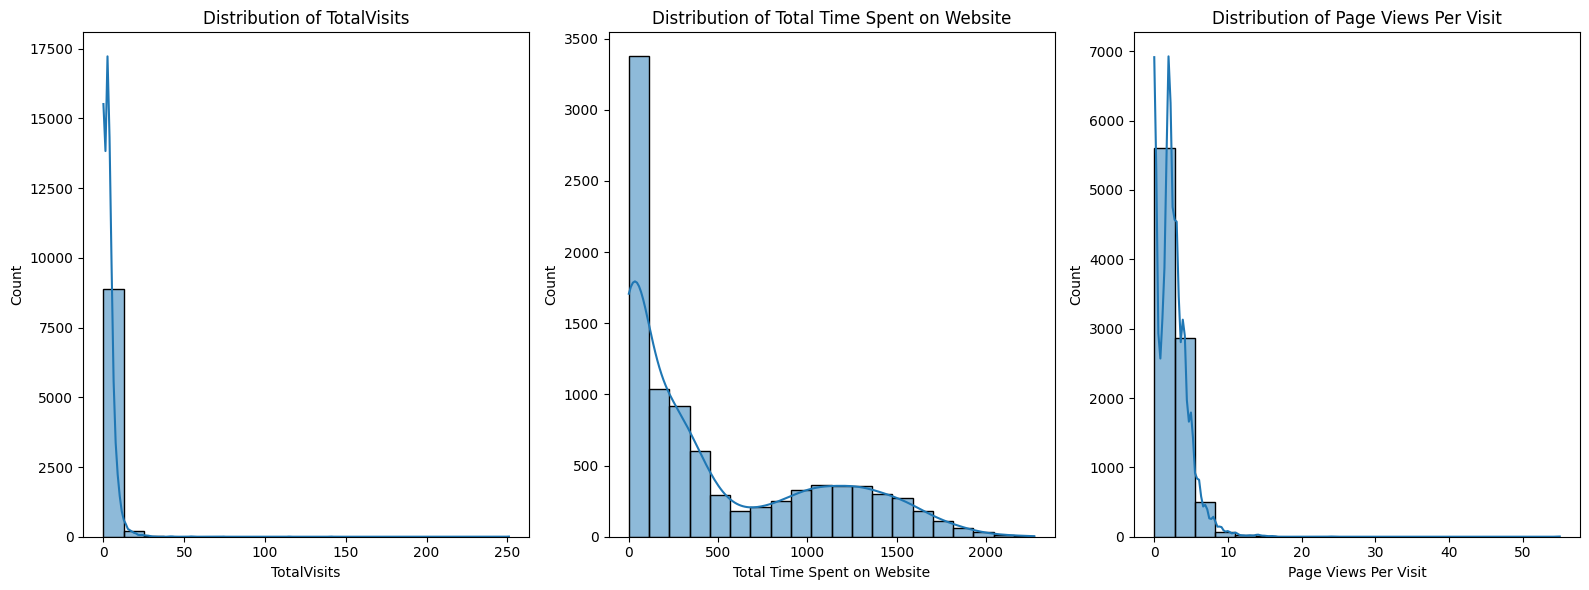

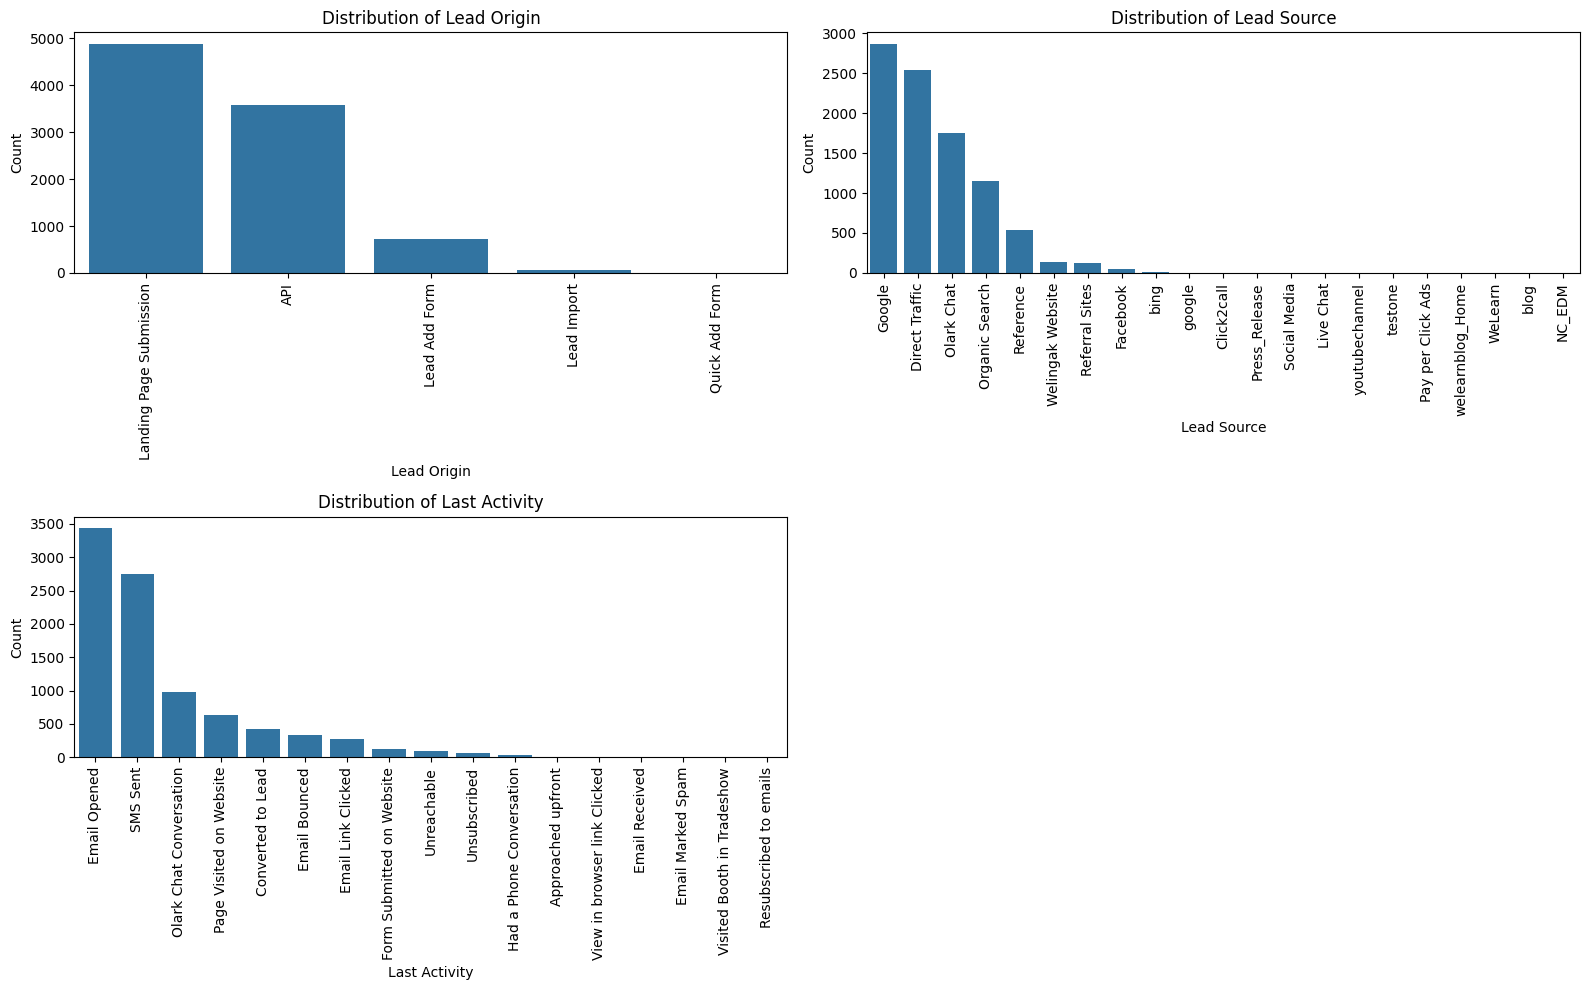

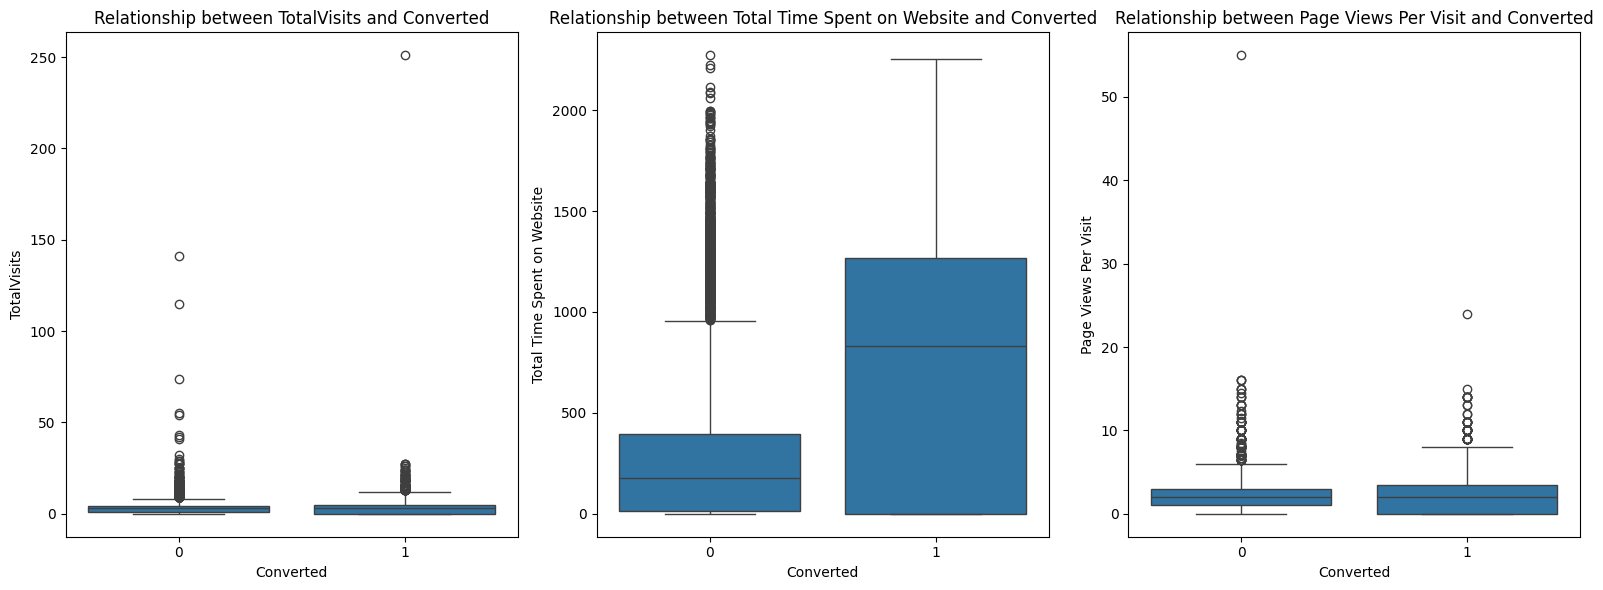

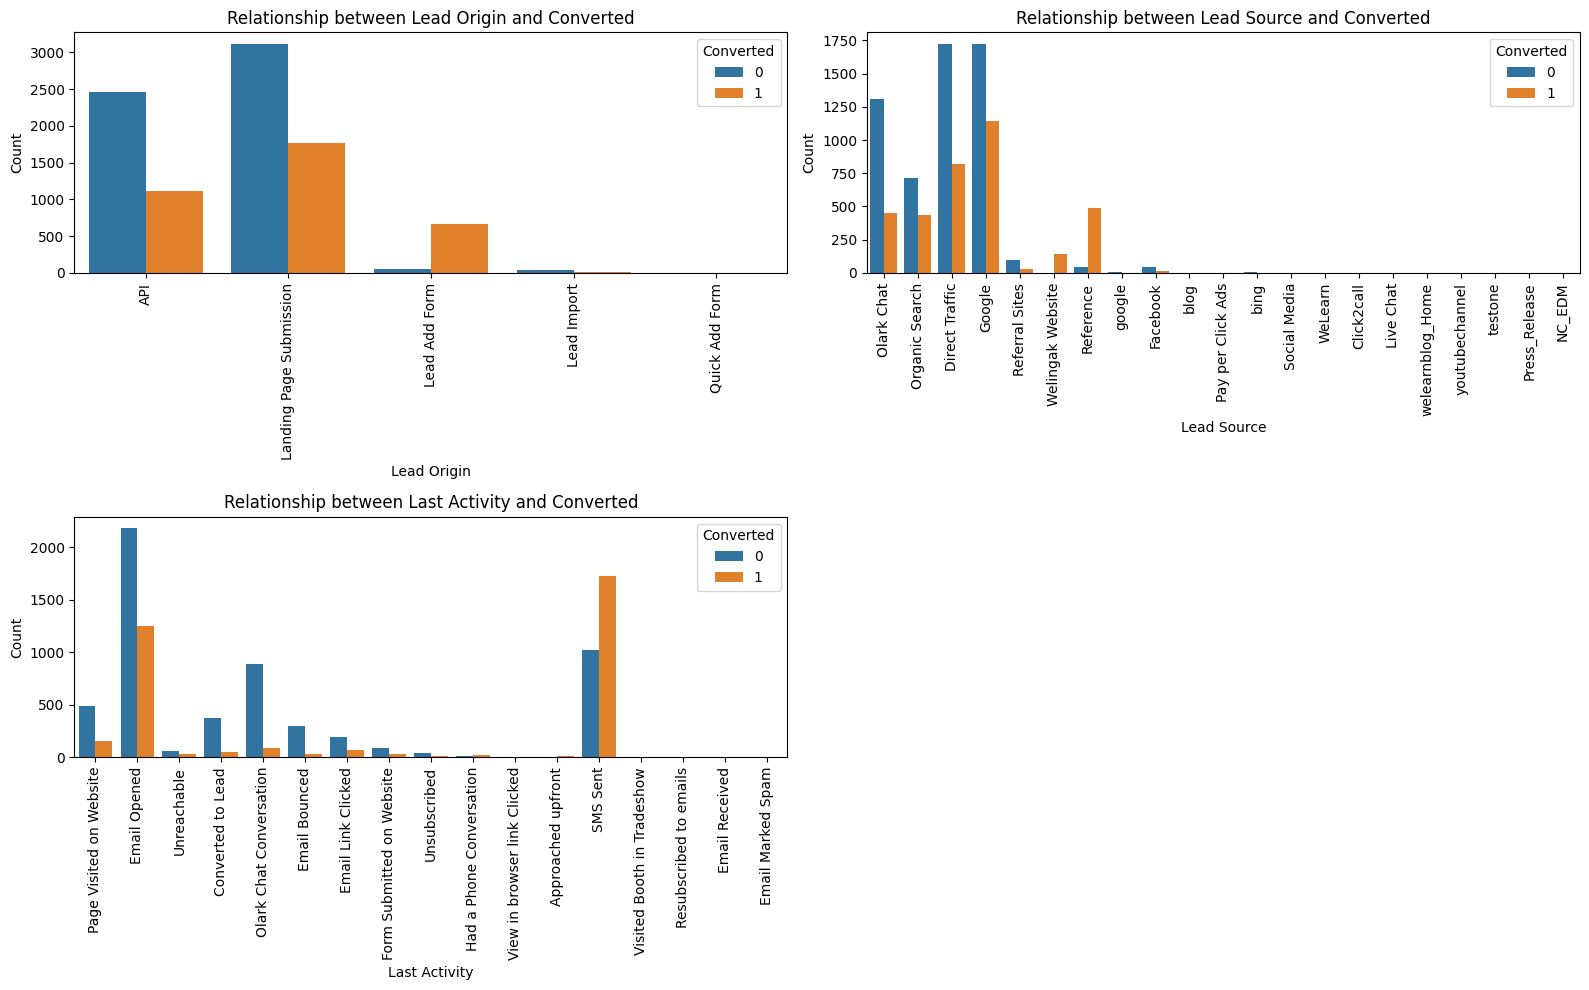

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Univariate Analysis
# 1. Distribution of the target variable ('Converted')
plt.figure(figsize=(8, 6))
sns.countplot(x='Converted', data=leads_data)
plt.title('Distribution of Converted Leads')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

# 2. Distribution of numerical variables
numerical_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(16, 6))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(leads_data[var], bins=20, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Distribution of categorical variables
categorical_vars = ['Lead Origin', 'Lead Source', 'Last Activity']
plt.figure(figsize=(16, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, data=leads_data, order=leads_data[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Bivariate Analysis
# 1. Relationship between numerical variables and the target variable
plt.figure(figsize=(16, 6))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Converted', y=var, data=leads_data)
    plt.title(f'Relationship between {var} and Converted')
    plt.xlabel('Converted')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

# 2. Relationship between categorical variables and the target variable
plt.figure(figsize=(16, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, hue='Converted', data=leads_data)
    plt.title(f'Relationship between {var} and Converted')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
categorical_vars = leads_data.select_dtypes(include='object').columns
print("\nLevels present in categorical variables:")
for var in categorical_vars:
    print(var, ":", leads_data[var].unique())


Levels present in categorical variables:
Prospect ID : ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Lead Origin : ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source : ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email : ['No' 'Yes']
Do Not Call : ['No' 'Yes']
Last Activity : ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Replace 'Select' with NaN in categorical variables
leads_data.replace('Select', np.nan, inplace=True)

# Drop irrelevant columns
irrelevant_cols = ['Prospect ID', 'Lead Number']
leads_data.drop(irrelevant_cols, axis=1, inplace=True)

# Handle missing values in numerical variables by filling with mean
numerical_vars = leads_data.select_dtypes(include='float64').columns
leads_data[numerical_vars] = leads_data[numerical_vars].fillna(leads_data[numerical_vars].mean())

# Handle missing values in categorical variables by filling with 'Unknown'
categorical_vars = leads_data.select_dtypes(include='object').columns
leads_data[categorical_vars] = leads_data[categorical_vars].fillna('Unknown')


In [ ]:
# One-hot encoding categorical variables
leads_data = pd.get_dummies(leads_data, drop_first=True)

# Display the first few rows of the cleaned dataset
print("First few rows of the cleaned dataset:")
print(leads_data.head())

First few rows of the cleaned dataset:
   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Asymmetrique Activity Score  Asymmetrique Profile Score  \
0                         15.0                        15.0   
1                         15.0                        15.0   
2                         14.0                        20.0   
3                         13.0                        17.0   
4                         15.0                        18.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the data into features (X) and target variable (y)
X = leads_data.drop('Converted', axis=1)
y = leads_data['Converted']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Scaling the features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)# Hyperparameter tuning using GridSearchCV

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg']
}

In [ ]:
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Score: 0.9406112274595806


In [ ]:
best_logreg_model = grid_search.best_estimator_
best_logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(C=10, max_iter=1000, solver='liblinear')

In [ ]:
# Making predictions on the testing set
y_pred = best_logreg_model.predict(X_test_scaled)# Making predictions on the testing set
y_pred = best_logreg_model.predict(X_test_scaled)# Evaluating the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1063   44]
 [  67  674]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1107
           1       0.94      0.91      0.92       741

    accuracy                           0.94      1848
   macro avg       0.94      0.93      0.94      1848
weighted avg       0.94      0.94      0.94      1848



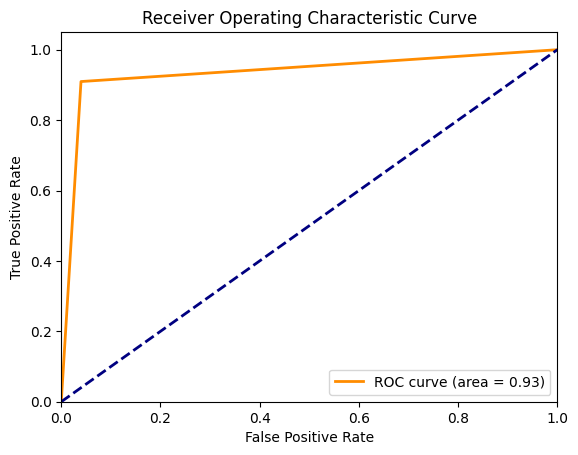

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

<ipython-input-46-a4ca84bda5a4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_variables.values, y=top_variables.index, palette='viridis')


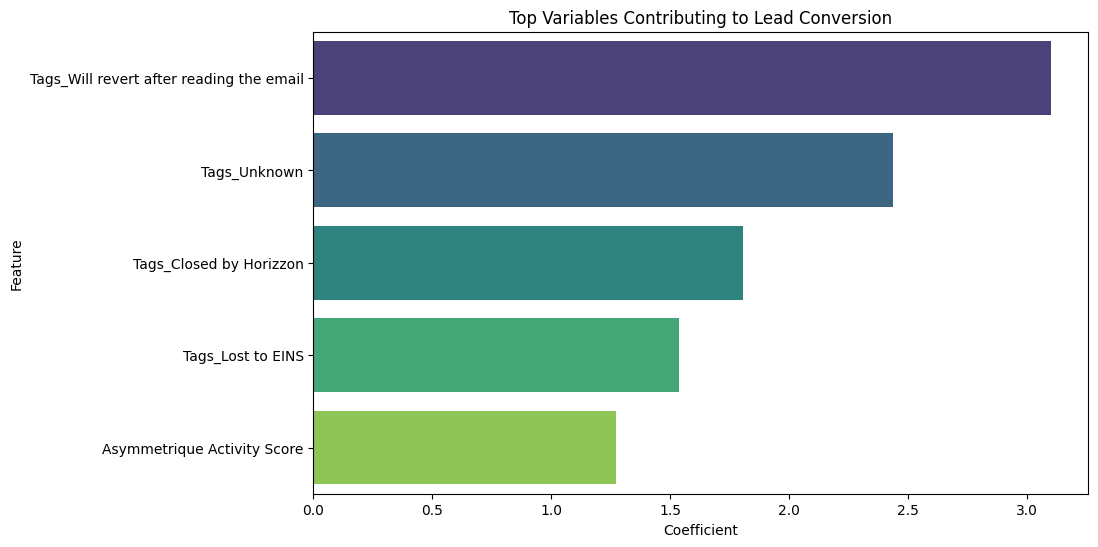

Recommendations based on logistic regression analysis:
- Focus on optimizing Tags_Will revert after reading the email, Tags_Unknown, Tags_Closed by Horizzon, Tags_Lost to EINS, Asymmetrique Activity Score to maximize lead conversion.
- Implement targeted strategies based on the insights gained from the analysis.


In [ ]:
# Extracting coefficients/feature importance
coefficients = best_logreg_model.coef_[0]
feature_names = X.columns
feature_importance = pd.Series(coefficients, index=feature_names).sort_values(ascending=False)

# Identifying top variables
top_variables = feature_importance.head(5)  # Selecting top 5 variables for example

# Visualizing insights
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_variables.values, y=top_variables.index, palette='viridis')
plt.title('Top Variables Contributing to Lead Conversion')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

# Recommendations
print("Recommendations based on logistic regression analysis:")
print("- Focus on optimizing", ", ".join(top_variables.index), "to maximize lead conversion.")
print("- Implement targeted strategies based on the insights gained from the analysis.")
